# Underway quick look at files

Load the data and make some plots and stuff using `kval`'s built-in functionality (basic stuff for now).

In [2]:
# Load the ctd module from the kval library  
from kval.data import ctd
# Set the matplotlib backend so we can interact with the plots (zoom, click buttons etc)
%matplotlib widget

## Load data from `.cnv`s

In [3]:
# Load the joined dataset
ds = ctd.ctds_from_cnv_dir('../../data/source/cnv/')
# Do some standard tweaks to metadata (not necessarily ideal formatting)
ds = ctd.metadata_auto(ds)

Found 44 .cnv files in  "../../data/source/cnv/".
NOTE: It seems the input data already binned -> using preexisting binning.


Joining profiles together:   0%|          | 0/44 [00:00<?, ?it/s]

In [4]:
ds

<xarray.Dataset> Size: 12MB
Dimensions:           (TIME: 44, PRES: 2707)
Coordinates:
  * PRES              (PRES) float64 22kB 2.0 3.0 4.0 ... 2.707e+03 2.708e+03
  * TIME              (TIME) float64 352B 1.96e+04 1.96e+04 ... 1.961e+04
Data variables: (12/18)
    TEMP1             (TIME, PRES) float64 953kB nan nan nan ... nan nan nan
    TEMP2             (TIME, PRES) float64 953kB nan nan nan ... nan nan nan
    CNDC1             (TIME, PRES) float64 953kB nan nan nan ... nan nan nan
    CNDC2             (TIME, PRES) float64 953kB nan nan nan ... nan nan nan
    DOXY1_instr       (TIME, PRES) float64 953kB nan nan nan ... nan nan nan
    DOXY2_instr       (TIME, PRES) float64 953kB nan nan nan ... nan nan nan
    ...                ...
    TIME_SAMPLE       (TIME, PRES) float64 953kB nan nan nan ... nan nan nan
    STATION           (TIME) <U4 704B '0222' '0223' '0224' ... '0264' '0265'
    LATITUDE          (TIME) float64 352B 78.84 78.83 78.83 ... 78.83 78.83
    LONGITUDE         (TIME) float64 352B -0.9497 -2.485 -3.002 ... 8.995 9.5
    CRUISE            <U66 264B '* Cruise name:Fram Strait Arctic Outflow Obs...
    PROCESSING        object 8B None
Attributes: (12/44)
    history:                         2023-08-31 to 2023-09-12: Data collectio...
    source:                          CTD profiles from SBE911+
    instrument:                      Sea-Bird SBE 9
    platform:                        Water-based Platforms>Vessels
    institution:                     Norwegian Polar Institute (NPI)
    cruise_name:                     * Cruise name:Fram Strait Arctic Outflow...
    ...                              ...
    instrument_vocabulary:           NASA/GCMD Instrument Keywords Version 17.2
    keywords_vocabulary:             NASA/GCMD Science Keywords 9.1.5
    iso_topic_category:              oceans
    Conventions:                     ACDD-1.3, CF-1.8
    naming_authority:                npolar.no
    ship:                            Kronprins Haakon [9566] ""

#### Look at the file 

Click-browse through variables and attributes to see that everything looks good.

## Quick looks
Note: Good practice to close the plots when you are done. Otherwise, they still take up memory.

#### Look at profile locations on a map

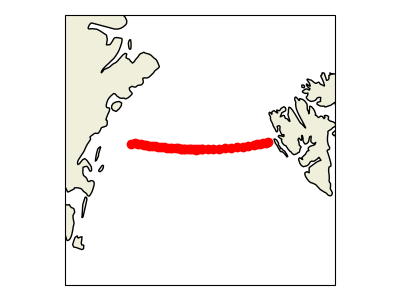

In [5]:
ctd.map(ds)

#### Look at some contours of the data

Use the interactive functionality to look through variables etc.

In [6]:
ctd.contour(ds)

#### Inspect individual profiles

In [7]:
ctd.inspect_profiles(ds)

#### Inspect dual sensors
Compare profiles from dual sensors, e.g. primary and secondary TEMP sensor.

In [8]:
ctd.inspect_dual_sensors(ds)

## Export to .mat

In case it is useful; export the dataset for analysis in Matlab. Note that we haven't really applied any post-processing steps, just joined the profiles and added some metadata.

In [ ]:
mat_dir = '../data/intermediate/mat/'
ctd.to_mat(ds, mat_dir + 'ctd_data_unprocessed', simplify = True)